In [47]:
#!pip install cmake
#!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#from google.colab import drive
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
import dlib
import cv2
import matplotlib.pyplot as plt
import sys
import os
import glob
import numpy as np
from google.colab.patches import cv2_imshow


In [50]:
def load_images(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Landmark Detection

## Testing on a Single Image

In [51]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

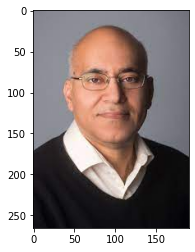

In [52]:
malik_path = '/content/drive/MyDrive/DeepFakeDetection/TestingNotebooks/Malik.jpeg'
malik = load_images(malik_path)
plt.imshow(malik)

In [53]:
predictor_path = '/content/drive/MyDrive/DeepFakeDetection/TestingNotebooks/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [54]:
malik = cv2.cvtColor(malik, cv2.COLOR_BGR2GRAY)
dets = detector(malik)

In [55]:
#predictor(gray, rect)
landmarks = predictor(malik, dets[0])
landmarks = shape_to_np(landmarks)

In [56]:
	for (x, y) in landmarks:
		cv2.circle(malik, (x, y), 1, (0, 0, 255), -1)

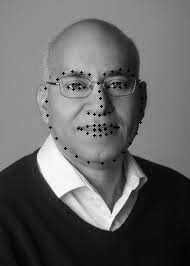

In [57]:
cv2_imshow(malik)

# Testing on Video

In [1]:
video_path = '../data/FakeAVCeleb_v1.2/RealVideo-RealAudio/African/men/id00076/00109.mp4'

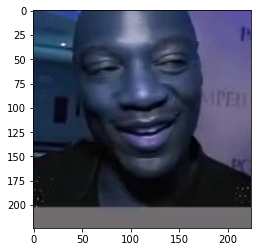

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(video_path)
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    #cv2.imshow('Frame',frame)
    plt.imshow(frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()